# Functionality 4

<p>"find_unique_nodes": it is a function that we only need to find the two unique nodes for the two time intervals (nodes which we then call in functionality 4).<p>
<p>"check_unique_nodes": it is a function to check whether the two nodes in input are unique for each time interval.<p>

In [1]:
import trees as t

In [2]:
def find_unique_nodes(start_1, end_1, start_2, end_2):
    # build two graphs for the two time intervals
    graph_1 = t.build("a", start_1, end_1)
    graph_2 = t.build("a", start_2, end_2)
    u_1 = list()
    u_2 = list()
    # collecting the nodes in the two graphs
    nodes_1 = list(graph_1.nodes())
    nodes_2 = list(graph_2.nodes())
    # collecting the nodes that are unique for interval 1 
    for n in nodes_1:
        if n not in nodes_2:
            u_1.append(n)
    # collecting the nodes that are unique for interval 2 
    for m in nodes_2:
        if m not in nodes_1:
            u_2.append(m)
    return u_1, u_2

In [3]:
def check_unique_nodes(start_1, end_1, start_2, end_2, user_1, user_2):
    check = True
    
    # build the two graphs for the intervals time in input
    graph_1 = t.build("a", start_1, end_1)
    graph_2 = t.build("a", start_2, end_2)
   
    # collecting the nodes in the two graphs
    nodes_1 = list(graph_1.nodes())
    nodes_2 = list(graph_2.nodes())
    
    # check wether the user_1 node in input is only in the graph_1
    # check wether the user_2 node in input is only in the graph_2
    if (user_1 in nodes_2) or (user_2 in nodes_1):
        check = False
    return check

- The maximum flow and minimum cut theorem  says that, in a flow network, the maximum flow passing from the source to the target is equal to the sum of the weights of the edges in the minimum cut. Then, to find the minimum cut between two nodes, we consider the FordFulkerson algorithm, which returns the max flow of a graph.
- We build the algorithm such that while exists a path between the soruce and the target in input, we calculate the path flow as the minimum of the weight of the path edges, then we will subtract this path_flow to the edges that are in the path.  
- We count the number of edges that are in minimum cut considering the edges that have weight equal to 0 (as we have subtracted before path_flow to the edges in tha path).

In [4]:
def mincut(graph, graph_copy, source, target):
    # initialize that the path exist as true
    path_exist = True
    edges = set()
    # loop until exist a path between the source and the target
    while path_exist:
        # initialize visited to keep track of the visited nodes, predecessor to keep track of the path
        visited, predecessor, queue = list(), dict(), list()
        visited.append(source)
        queue.append(source)
        # loop on the queue
        while queue:
            # select the first node from the queue
            v = queue.pop(0)
            for u in graph.neighbors(v):
                # for each adjacent node to v we consider it if the node has not been visisted yet and if its weight is bigger than 0
                if (u not in visited) and (graph[v][u]["weight"] > 0): 
                    # we add the node u in queue and visisted list
                    queue.append(u)
                    visited.append(u)
                    predecessor[u] = v
                    # if we find a path between the source and the target we compute the path_flow and we update the edges of the path
                    if u == target:
                        last = target
                        while last != source:
                            edges.add((predecessor[last], last))       
                            last = predecessor[last]
                        path_flow = min(graph[j][i]["weight"] for i,j in predecessor.items())
                        for i,j in predecessor.items():
                            graph[j][i]["weight"] -= path_flow
                                
        # if it doesn't exist a path between source and target we update the boolan to stop the loop 
        if target not in predecessor:
            path_exist = False
    # counting the number of edges we need to delect to disconnect source and target and collecting the edges we remove      
    min_edges = 0
    to_remove = list()
    for (i,j) in edges:
        if graph[i][j]["weight"] == 0 and  graph_copy[i][j]["weight"] > 0:
            min_edges += 1
            to_remove.append([i,j])
    return min_edges, to_remove, edges

In [5]:
def functionality_4(start_1, end_1, start_2, end_2, user_1, user_2):
    # check if the the nodes are unique for the two separated graphs
    check = check_unique_nodes(start_1, end_1, start_2, end_2, user_1, user_2)
    if check == False:
        return "The nodes in input should be unique for each interval"
    # create the graph considering two different intervals of time
    graph = t.build("a", start_1, end_1, start_2, end_2)
    graph_copy = graph.copy()
    #using FordFulkerson function to find the min_edges
    min_edges, to_remove, edges = mincut(graph, graph_copy, user_1, user_2)
    return min_edges

In the following cells we show some examples of two nodes to disconnect, with different number of edges needed to disconnect them

In [6]:
print(functionality_4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 1600, 136))

The nodes in input should be unique for each interval


In [14]:
print(functionality_4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 3877, 357))

4


In [9]:
print(functionality_4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 3877, 370899))

3


In [13]:
print(functionality_4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 1600, 3404))

2


# Visualization 4
#### Show a visualization of the links needed to be removed in order to disconnect both graphs.
- Point 1) The link needed to be removed in order to disconnect the graphs are the edges colored in red. 
- Point 2) In order to give a better idea we also plot in black the edges that are in the path between user_1 and user_2 and that are not removed because we only removed the minimum number of edges needed to disconnect the two graphs;
- Point 3) In the case in which instead the number of edges of the path and the number of edges needed to be removed is equal, to give a more general idea of the graph, we add to the plot 3 neighbor edges for each node in the plot.

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

In [18]:
def visualization_4(start_1, end_1, start_2, end_2, user_1, user_2):
    # check if the the nodes are unique for the two separated graphs
    check = check_unique_nodes(start_1, end_1, start_2, end_2, user_1, user_2)
    if check == False:
        return "The nodes in input should be unique for each interval"
    # create the graph considering two different intervals of time
    graph = t.build("a", start_1, end_1, start_2, end_2)
    graph_copy = graph.copy()
    #we use mincut to compute the number of edges to remove, the (u,v) edge that we remove and the (u,v) edge that is in the path between u1 and u2
    min_edges, edge_to_remove, edges = mincut(graph, graph_copy, user_1, user_2)
    print(edge_to_remove, edges)
    
    #initialize the graph
    g = nx.DiGraph()
    already_added = list()
    
    # for each edge in the path between the user_1 and user_2  
    for (i,j) in edges:
        # if the edge is in the list of edges we have to remove we add it to g and we color it in red
        if list((i,j)) in edge_to_remove:
            g.add_edge(i, j, color="r")
        # if the edge is not in the list of edges we have to remove, we add it to g and we color it in black
        else:
            g.add_edge(i, j, color="black")
    
    # we do a copy of the graph in order to be able to compute the point 3
    g_copy = g.copy()
    # if the len of edges in the path is equal to th edges we remove, we add the neighbor edges of the nodes in g to give a more general idea of the graph
    if len(edge_to_remove) == len(edges):
        for node in g_copy:
            count = 0
            for (u,v) in graph_copy.out_edges(node):
                # we add the neighnor edge to the graph if it's not already in the graph and if we did not add already more than 3 edges to g
                if not g.has_edge(u, v) and count < 3:
                    g.add_edge(u,v, color="black")
                    count += 1
                
    colors = [g[u][v]['color'] for u,v in g.edges]
    nx.draw(g, node_color="green", edge_color = colors, node_size = 1000, width=1.5, with_labels=True)
    return plt.show(g)

[[797, 3404], [1600, 797]] {(797, 3404), (1600, 797)}


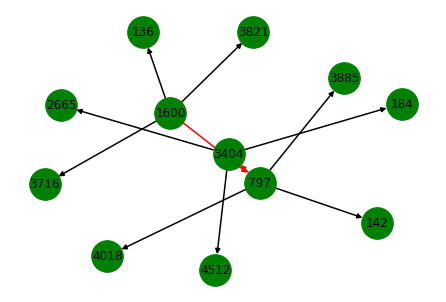

None


In [19]:
print(visualization_4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 1600, 3404))

[[1463, 370899], [3877, 3869], [3869, 1463]] {(1463, 370899), (3877, 3869), (3869, 1463)}


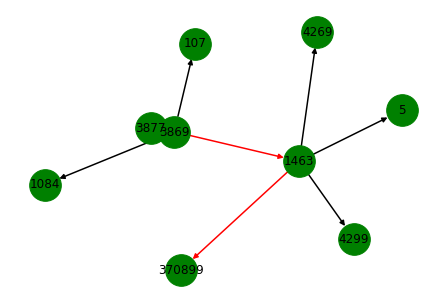

None


In [20]:
print(visualization_4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 3877, 370899))

[[3869, 1463], [3877, 3869], [4299, 357], [1463, 4299]] {(3869, 1463), (3877, 3869), (4299, 357), (1463, 4299)}


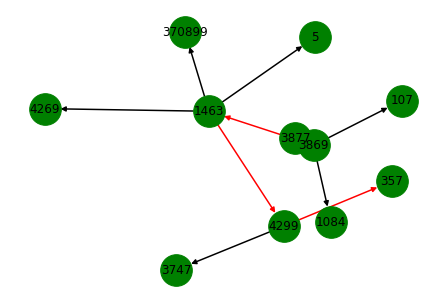

None


In [21]:
print(visualization_4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 3877, 357))